In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('cohorts.csv')
print(df.head())


         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [13]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [14]:
# Add a new column 'year'
df['year'] = df['Date'].dt.year


In [15]:
# Add a new column 'month' as the 2nd column
df.insert(1, 'month', df['Date'].dt.month)

In [16]:
# Show the updated DataFrame
print(df.head())


        Date  month  New users  Returning users  Duration Day 1  \
0 2023-10-25     10       3461             1437      202.156977   
1 2023-10-26     10       3777             1554      228.631944   
2 2023-10-27     10       3100             1288      227.185841   
3 2023-10-28     10       2293              978      261.079545   
4 2023-10-29     10       2678             1082      182.567568   

   Duration Day 7  year  
0      162.523809  2023  
1      258.147059  2023  
2      233.550000  2023  
3      167.357143  2023  
4      304.350000  2023  


In [17]:
# Remove the columns 'year' and 'month'
df.drop(columns=['year', 'month'], inplace=True)


In [18]:
# Show the updated DataFrame after removal
print(df.head())

        Date  New users  Returning users  Duration Day 1  Duration Day 7
0 2023-10-25       3461             1437      202.156977      162.523809
1 2023-10-26       3777             1554      228.631944      258.147059
2 2023-10-27       3100             1288      227.185841      233.550000
3 2023-10-28       2293              978      261.079545      167.357143
4 2023-10-29       2678             1082      182.567568      304.350000


In [19]:
# Show records where 'Returning users' is 0
returning_users_zero = df[df['Returning users'] == 0]
print(returning_users_zero)
print(f"Number of records where 'Returning users' is 0: {returning_users_zero.shape[0]}")


Empty DataFrame
Columns: [Date, New users, Returning users, Duration Day 1, Duration Day 7]
Index: []
Number of records where 'Returning users' is 0: 0


In [21]:
# Add the 'year' column again
df['year'] = df['Date'].dt.year

In [22]:
# Group by 'year' and calculate max and min 'Duration Day 1'
duration_day1_stats = df.groupby('year')['Duration Day 1'].agg(['max', 'min']).reset_index()
print(duration_day1_stats)


   year        max        min
0  2023  445.87234  59.047619


In [23]:
# Find the maximum and minimum 'New users' recorded per day
max_new_users = df['New users'].max()
min_new_users = df['New users'].min()

print(f"Maximum 'New users' recorded per day: {max_new_users}")
print(f"Minimum 'New users' recorded per day: {min_new_users}")


Maximum 'New users' recorded per day: 4790
Minimum 'New users' recorded per day: 1929


In [24]:
# Filter records where 'Duration Day 1' is less than 200
filtered_df = df[df['Duration Day 1'] < 200]

In [25]:
# Count the number of records per year
count_per_year = filtered_df.groupby('year').size().reset_index(name='count')
print(count_per_year)

   year  count
0  2023     12


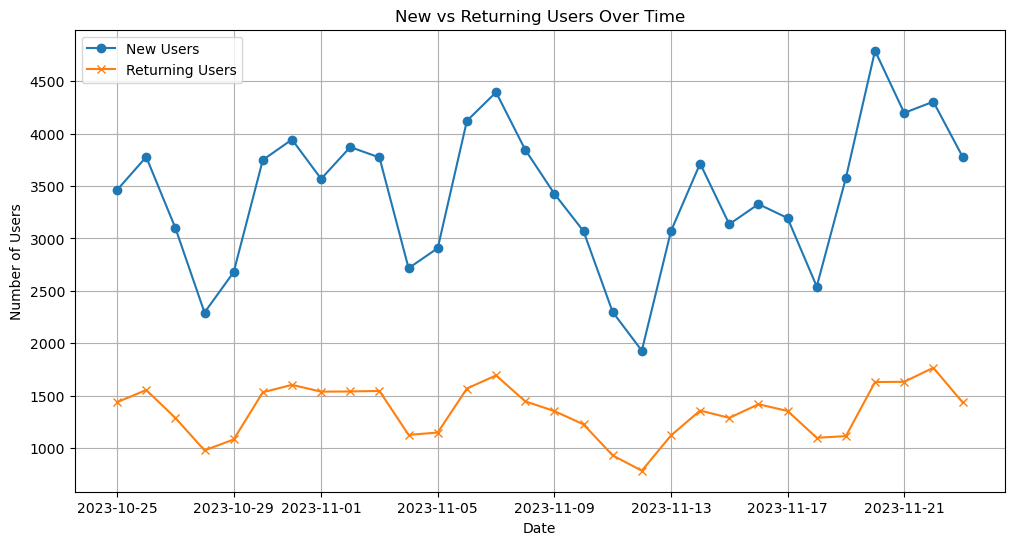

In [26]:

#Trend Analysis for New and Returning Users
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['New users'], label='New Users', marker='o')
plt.plot(df['Date'], df['Returning users'], label='Returning Users', marker='x')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('New vs Returning Users Over Time')
plt.legend()
plt.grid(True)
plt.show()


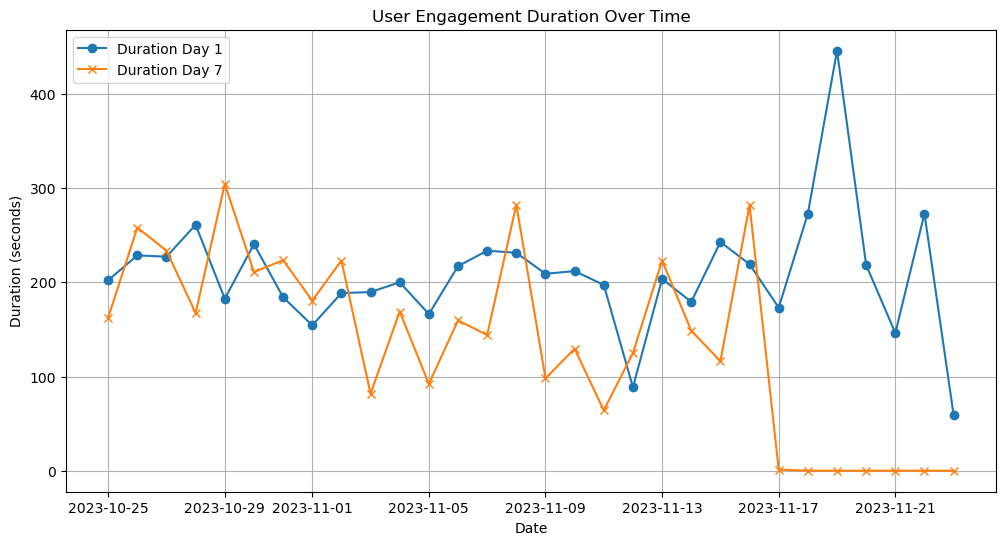

In [27]:
#engagement duration over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Duration Day 1'], label='Duration Day 1', marker='o')
plt.plot(df['Date'], df['Duration Day 7'], label='Duration Day 7', marker='x')
plt.xlabel('Date')
plt.ylabel('Duration (seconds)')
plt.title('User Engagement Duration Over Time')
plt.legend()
plt.grid(True)
plt.show()


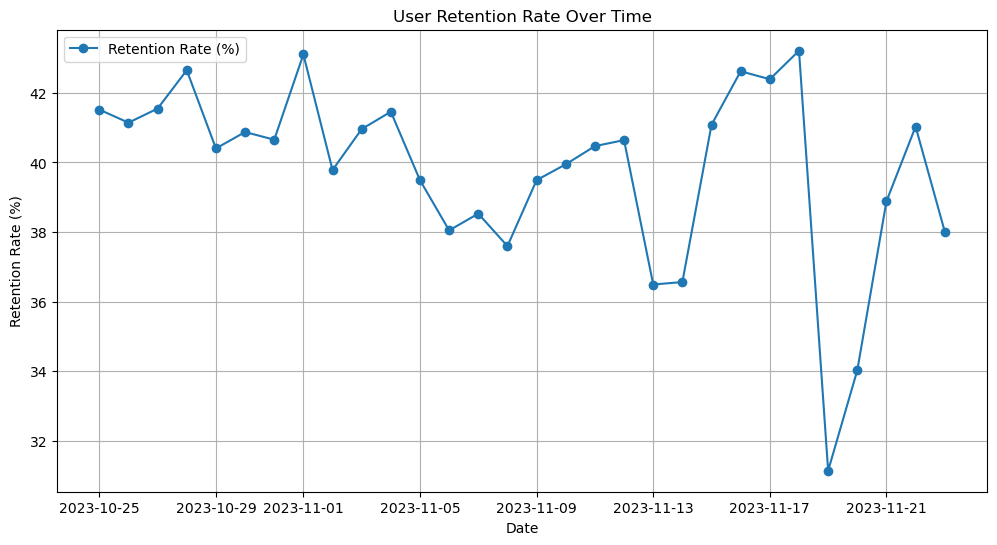

In [28]:
retention rate calculation

df['Retention Rate (%)'] = (df['Returning users'] / df['New users']) * 100

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Retention Rate (%)'], label='Retention Rate (%)', marker='o')
plt.xlabel('Date')
plt.ylabel('Retention Rate (%)')
plt.title('User Retention Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()
